In [1]:
import pickle
import random

import pyleoclim as pyleo
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.transforms as transforms
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import ammonyte as amt
from tqdm import tqdm

In [2]:
def detect_transitions(series,transition_interval=None):
    '''Function to detect transitions across a confidence interval
    
    Parameters
    ----------
    
    series : pyleo.Series, amt.Series
        Series to detect transitions upon
        
    transition_interval : list,tuple
        Upper and lower bound for the transition interval
    
    Returns
    -------
    
    transitions : list
        Timing of the transitions of the series across its confidence interval
    '''
    series_fine = series.interp(step=1)
    
    if transition_interval is None:
        upper, lower = amt.utils.sampling.confidence_interval(series)
    else:
        upper, lower = transition_interval

    above_thresh = np.where(series_fine.value > upper,1,0)
    below_thresh = np.where(series_fine.value < lower,1,0)

    transition_above = np.diff(above_thresh)
    transition_below = np.diff(below_thresh)

    upper_trans = series_fine.time[1:][np.diff(above_thresh) != 0]
    lower_trans = series_fine.time[1:][np.diff(below_thresh) != 0]

    full_trans = np.zeros(len(transition_above))

    last_above = 0
    last_below = 0
    for i in range(len(transition_above)):
        above = transition_above[i]
        below = transition_below[i]
        if above != 0:
            if last_below+above == 0:
                loc = int((i+below_pointer)/2)
                full_trans[loc] = 1
                last_below=0
            last_above = above
            above_pointer = i
        if below != 0:
            if last_above + below == 0:
                loc = int((i+above_pointer)/2)
                full_trans[loc] = 1
                last_above=0
            last_below = below
            below_pointer = i

    transitions = series_fine.time[1:][full_trans != 0]
    
    return transitions

In [3]:
color_list = sns.color_palette('colorblind')

In [4]:
data_folder = './data/8k_ice'
data = pyleo.Lipd(data_folder)
lipd_series_list = data.to_LipdSeriesList()

lipd_series_dict = {}

for series in lipd_series_list:
    ms_series = series.copy()
    print(f'{ms_series.label} : {ms_series.value_name}')
    if ms_series.label not in lipd_series_dict:
        lipd_series_dict[ms_series.label] = []
        lipd_series_dict[ms_series.label].append(series)
    else:
        lipd_series_dict[ms_series.label].append(ms_series)
        
index_dict = {
    'GRIP.GRIP.1992' : 2,
    'Renland.Johnsen.1992' : 2,
    'EDML.Stenni.2010' : 2,
    'EPICADomeC.Stenni.2010' : 5,
    'Vostok.Vimeux.2002' : 2,
    'GISP2.Grootes.1997' : 1,
    'NGRIP.NGRIP.2004' : 0,
    'DomeF.Uemura.2018' : 4,
    'TALDICE.Mezgec.2017' : 3,
    'WAISDivide.Cuffey.2016' : 1
}

greenland_ms_list = []
antarctica_ms_list = []
count = 0

for label in list(lipd_series_dict.keys()):
    index = index_dict[label]
    for idx,series in enumerate(lipd_series_dict[label]):
        if idx == index:
            if series.lipd_ts['geo_meanLat'] > 0:
                series.time_unit = 'Years BP'
                greenland_ms_list.append(series)
            else:
                series.time_unit = 'Years BP'
                antarctica_ms_list.append(series)

/var/folders/5k/0y4jsz592qq0y78c_0ddgcpm0000gn/T/ipykernel_75391/367793977.py:2: DeprecationWarning: The Lipd class is being deprecated and will be removed in Pyleoclim v1.0.0. Functionalities will instead be handled by the pyLipd package.
  data = pyleo.Lipd(data_folder)


Disclaimer: LiPD files may be updated and modified to adhere to standards

Found: 8 LiPD file(s)
reading: Renland.Johnsen.1992.lpd
reading: EDML.Stenni.2010.lpd
reading: EPICADomeC.Stenni.2010.lpd
reading: Vostok.Vimeux.2002.lpd
reading: GISP2.Grootes.1997.lpd
reading: GRIP.GRIP.1992.lpd
reading: NGRIP.NGRIP.2004.lpd
reading: TALDICE.Mezgec.2017.lpd
Finished read: 8 records
extracting paleoData...
extracting: Renland.Johnsen.1992
extracting: EDML.Stenni.2010
extracting: EPICADomeC.Stenni.2010
extracting: Vostok.Vimeux.2002
extracting: GISP2.Grootes.1997
extracting: GRIP.GRIP.1992
extracting: NGRIP.NGRIP.2004
extracting: TALDICE.Mezgec.2017
Created time series: 39 entries
Both age and year information are available, using age
Both age and year information are available, using age
Both age and year information are available, using age
Renland.Johnsen.1992 : depth
Renland.Johnsen.1992 : age
Renland.Johnsen.1992 : d18O
EDML.Stenni.2010 : bagDepth
EDML.Stenni.2010 : age
EDML.Stenni.2010 : b

The two series have different lengths, left: 508 vs right: 545
Metadata are different:
value_name property -- left: d18O, right: bagd18O
label property -- left: Renland.Johnsen.1992, right: EPICADomeC.Stenni.2010
The two series have different lengths, left: 973 vs right: 545
Metadata are different:
value_name property -- left: d18O, right: bagd18O
label property -- left: GISP2.Grootes.1997, right: EPICADomeC.Stenni.2010
The two series have different lengths, left: 2032 vs right: 545
Metadata are different:
value_name property -- left: d18O, right: bagd18O
label property -- left: GRIP.GRIP.1992, right: EPICADomeC.Stenni.2010
The two series have different lengths, left: 508 vs right: 545
Metadata are different:
value_name property -- left: d18O, right: bagd18O
label property -- left: NGRIP.NGRIP.2004, right: EPICADomeC.Stenni.2010


(<Figure size 800x1000 with 6 Axes>,
 {0: <Axes: ylabel='d18O [permil]'>,
  1: <Axes: ylabel='d18O [permil]'>,
  2: <Axes: ylabel='d18O [permil]'>,
  3: <Axes: ylabel='d18O [permil]'>,
  4: <Axes: ylabel='bagd18O [permil]'>,
  5: <Axes: xlabel='Age [Years BP]'>})

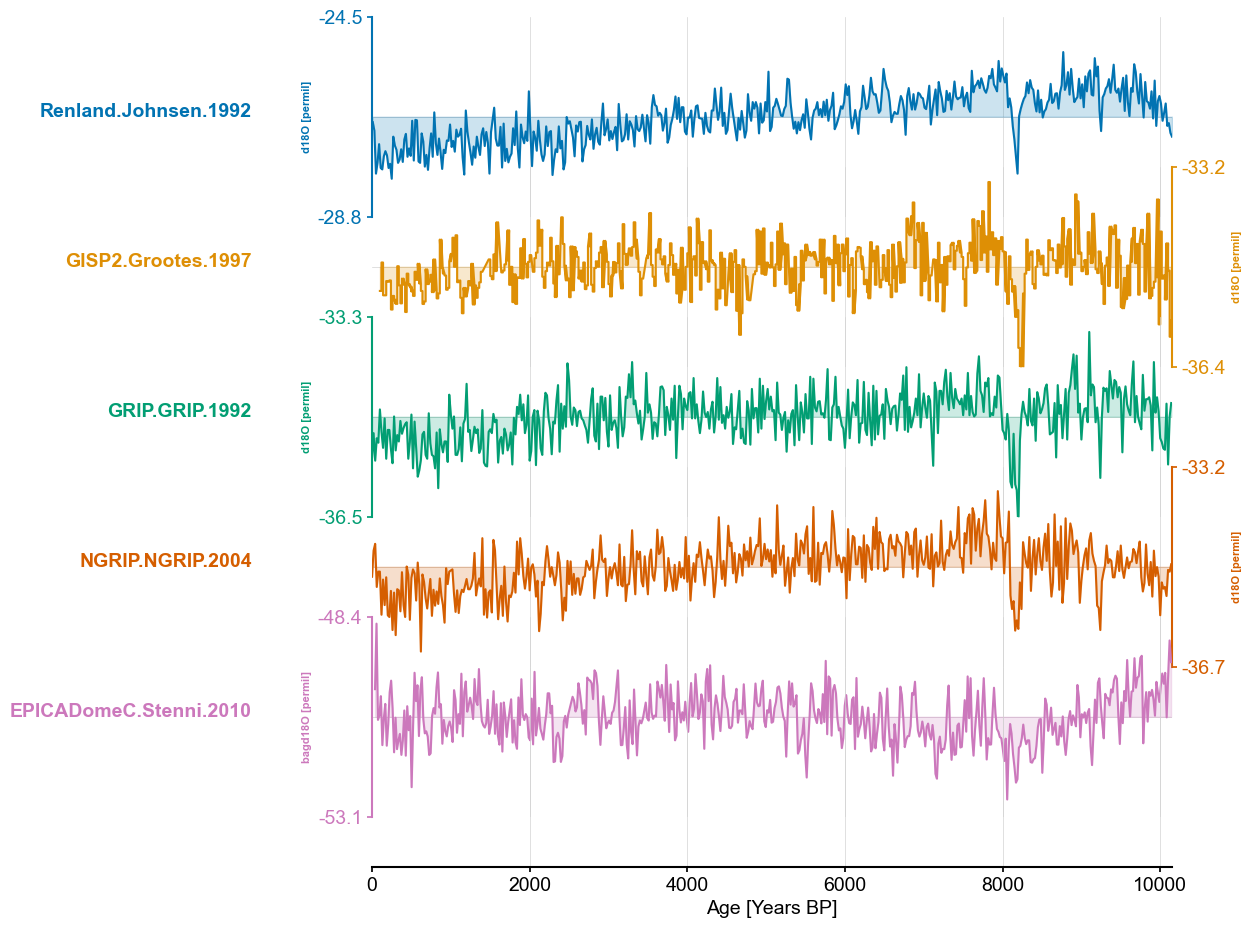

In [5]:
end_time=10150

greenland_ms = pyleo.MultipleSeries([series.slice((0,end_time)) for series in greenland_ms_list]).append(antarctica_ms_list[1].interp().slice((0,end_time)))
greenland_ms.stackplot(colors=color_list[:len(greenland_ms.series_list)],figsize=(8,10))

In [6]:
study_lp = []
m = 12
tau = 4

for idx,series in enumerate(greenland_ms.series_list):
    if idx != 4:
        amt_series = amt.Series(
            time=series.time,
            value=series.value,
            time_name = series.time_name,
            value_name = series.value_name,
            time_unit = series.time_unit,
            value_unit = series.value_unit,
            label = series.label,
            clean_ts=False,
            sort_ts=None
        ).convert_time_unit('Years').interp().detrend(method='savitzky-golay')
    else:
        amt_series = amt.Series(
            time=series.time,
            value=series.value,
            time_name = series.time_name,
            value_name = series.value_name,
            time_unit = series.time_unit,
            value_unit = series.value_unit,
            label = series.label,
            clean_ts=False,
            sort_ts=None
        ).convert_time_unit('Years').interp()
    td = amt_series.embed(m,tau)
    eps = td.find_epsilon(1)
    rm = eps['Output']
    lp = rm.laplacian_eigenmaps(w_size=20,w_incre=4).convert_time_unit('Years BP')
    study_lp.append(lp)

Initial density is 0.0425
Initial density is within the tolerance window!


/Users/alexjames/Documents/GitHub/Pyleoclim_util/pyleoclim/core/series.py:163: UserWarning: No time_name parameter provided. Assuming "Time".
  warnings.warn('No time_name parameter provided. Assuming "Time".', UserWarning)


Initial density is 0.0574
Initial density is within the tolerance window!


/Users/alexjames/Documents/GitHub/Pyleoclim_util/pyleoclim/core/series.py:163: UserWarning: No time_name parameter provided. Assuming "Time".
  warnings.warn('No time_name parameter provided. Assuming "Time".', UserWarning)


Initial density is 0.1646
Initial density is not within the tolerance window, searching...
Epsilon: 0.0000, Density: 0.0000
Epsilon: 0.5000, Density: 0.0026
Epsilon: 0.5000, Density: 0.0026
Epsilon: 0.7371, Density: 0.0250
Epsilon: 0.7371, Density: 0.0250
Epsilon: 0.8622, Density: 0.0701
Epsilon: 0.8622, Density: 0.0701
Epsilon: 0.7617, Density: 0.0313
Epsilon: 0.7617, Density: 0.0313
Epsilon: 0.8554, Density: 0.0667
Epsilon: 0.8554, Density: 0.0667
Epsilon: 0.7719, Density: 0.0342
Epsilon: 0.7719, Density: 0.0342
Epsilon: 0.8511, Density: 0.0646
Epsilon: 0.8511, Density: 0.0646
Epsilon: 0.7781, Density: 0.0360
Epsilon: 0.7781, Density: 0.0360
Epsilon: 0.8479, Density: 0.0631
Epsilon: 0.8479, Density: 0.0631
Epsilon: 0.7824, Density: 0.0374
Epsilon: 0.7824, Density: 0.0374
Epsilon: 0.8454, Density: 0.0619
Epsilon: 0.8454, Density: 0.0619
Epsilon: 0.7860, Density: 0.0385
Epsilon: 0.7860, Density: 0.0385
Epsilon: 0.8432, Density: 0.0609
Epsilon: 0.8432, Density: 0.0609
Epsilon: 0.7886, D

/Users/alexjames/Documents/GitHub/Pyleoclim_util/pyleoclim/core/series.py:163: UserWarning: No time_name parameter provided. Assuming "Time".
  warnings.warn('No time_name parameter provided. Assuming "Time".', UserWarning)


Initial density is 0.0217
Initial density is not within the tolerance window, searching...
Epsilon: 1.0000, Density: 0.0217
Epsilon: 1.1416, Density: 0.0583
Epsilon: 1.1416, Density: 0.0583.


/Users/alexjames/Documents/GitHub/Pyleoclim_util/pyleoclim/core/series.py:163: UserWarning: No time_name parameter provided. Assuming "Time".
  warnings.warn('No time_name parameter provided. Assuming "Time".', UserWarning)


Initial density is 0.0021
Initial density is not within the tolerance window, searching...
Epsilon: 1.4786, Density: 0.0110
Epsilon: 1.8682, Density: 0.0614
Epsilon: 1.7544, Density: 0.0386
Epsilon: 1.8680, Density: 0.0613
Epsilon: 1.7547, Density: 0.0387
Epsilon: 1.8679, Density: 0.0613
Epsilon: 1.7550, Density: 0.0387
Epsilon: 1.8678, Density: 0.0613
Epsilon: 1.7552, Density: 0.0388
Epsilon: 1.8676, Density: 0.0612
Epsilon: 1.7556, Density: 0.0388
Epsilon: 1.8676, Density: 0.0612
Epsilon: 1.7557, Density: 0.0388
Epsilon: 1.8673, Density: 0.0611
Epsilon: 1.7559, Density: 0.0389
Epsilon: 1.8672, Density: 0.0611
Epsilon: 1.7560, Density: 0.0389
Epsilon: 1.8669, Density: 0.0611
Epsilon: 1.7563, Density: 0.0389
Epsilon: 1.8669, Density: 0.0611
Epsilon: 1.7563, Density: 0.0389
Epsilon: 1.7563, Density: 0.0389
Epsilon: 1.8116, Density: 0.0488
Epsilon: 1.8116, Density: 0.0488.


/Users/alexjames/Documents/GitHub/Pyleoclim_util/pyleoclim/core/series.py:163: UserWarning: No time_name parameter provided. Assuming "Time".
  warnings.warn('No time_name parameter provided. Assuming "Time".', UserWarning)


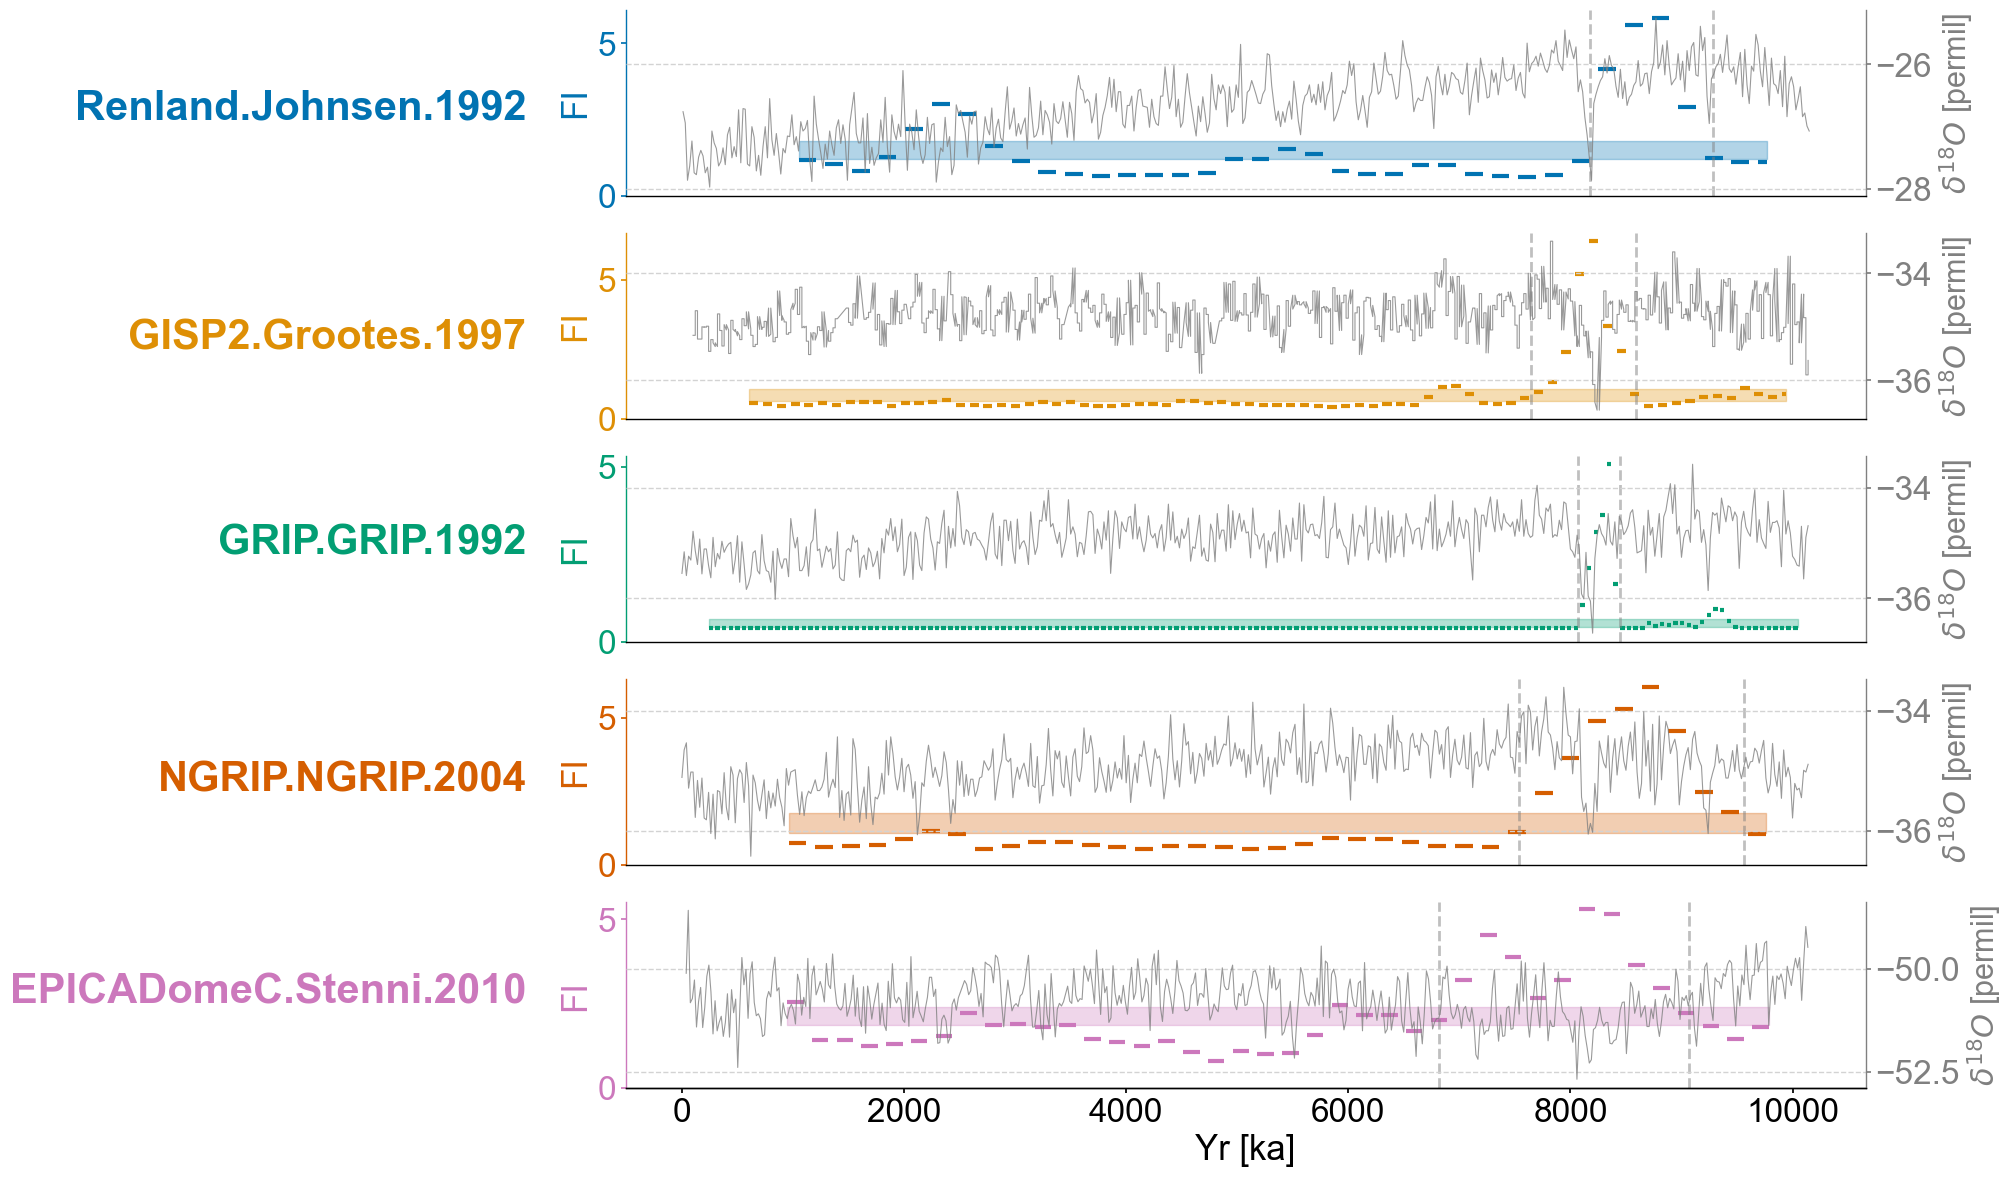

In [7]:
ms = greenland_ms
lp_series_list = study_lp

SMALL_SIZE = 22
MEDIUM_SIZE = 24
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig,axes = plt.subplots(nrows=len(lp_series_list),ncols=1,sharex=True,figsize=(16,14))
transition_timing = []

for idx,lp_series in enumerate(lp_series_list):
    ts = lp_series
    ts.label = lp_series.label
    ts.value_name = 'FI'
    ts.value_unit = None
    ts.time_name = 'Yr'
    ts.time_unit = 'ka'

    ax = axes[idx]
    ts_smooth = amt.utils.fisher.smooth_series(ts,3)
    upper, lower = amt.utils.sampling.confidence_interval(ts)
    transitions=detect_transitions(ts_smooth,transition_interval=(upper,lower))
    transition_timing=[]
    
    for transition in transitions:
        if lp_series.label == "GISP2.Grootes.1997":
            if transition > 7500 and transition < 9000:
                transition_timing.append(transition)
        elif lp_series.label == "GRIP.GRIP.1992":
            if transition > 7500 and transition < 8700:
                transition_timing.append(transition)
        elif lp_series.label == "EPICADomeC.Stenni.2010":
            if transition > 6500 and transition < 10000:
                transition_timing.append(transition)
        elif lp_series.label == "NGRIP.NGRIP.2004":
            if transition > 6500:
                transition_timing.append(transition)
        else:
            if transition > 6200 and transition < 10000:
                transition_timing.append(transition)
    ts.confidence_smooth_plot(
        ax=ax,
        background_series = ms.series_list[idx].slice((0,end_time)),
        transition_interval=(upper,lower),
        block_size=3,
        color=color_list[idx],
        figsize=(12,6),
        legend=True,
        lgd_kwargs={'loc':'upper left'},
        hline_kwargs={'label':None},
        background_kwargs={'ylabel':'$\delta^{18}O$ [permil]','legend':False,'linewidth':.8,'color':'grey','alpha':.8})
    
    for transition in transition_timing:
        ax.axvline(transition,color='grey',linestyle='dashed',alpha=.5)
    
    trans = transforms.blended_transform_factory(ax.transAxes, ax.transData)
    ax.text(x=-.08, y = 2.5, s = ts.label, horizontalalignment='right', transform=trans, color=color_list[idx], weight='bold',fontsize=30)
        
    ax.spines['left'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_label_position('left')
    ax.yaxis.tick_left()
    ax.get_legend().remove()
    ax.set_title(None)
    ax.grid(visible=False,axis='y')
    if idx != len(lp_series_list)-1:
        ax.set_xlabel(None)
        ax.spines[['bottom']].set_visible(False)
        ax.tick_params(bottom=False)
    ax.xaxis.label.set_fontsize(25)
    ax.yaxis.label.set_fontsize(25)
    ax.set_yticks(ticks=np.array([0,5]))
    
    